# <font color = 'red'> Mall Customers Clustering Project

## **Part1: Data description

1. CustomerID: It is the unique ID given to a customer
2. Gender: Gender of the customer
3. Age: The age of the customer
4. Annual Income(k$): It is the annual income of the customer
5. Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

Data source: https://www.kaggle.com/sivaram1987/mall-customers

In [7]:
import os
os.chdir("/Users/howar/Desktop/2.Mall_customers_Project")
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Clustering algorithms
from sklearn.cluster import KMeans

## **Part2: Explore and Clean data

### Import dataset and have basic understanding of it

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [15]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

<font color = 'blue'> We can see that there are no missing value and the size of dataset is (200 rows, 5 columns)

In [20]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [22]:
df.describe().T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
CustomerID,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [26]:
df.describe(include = 'O').T

,count,unique,top,freq
Genre,200,2,Female,112


<font color = 'blue'> The 3 panels above can give me the basic understanding of the dataset

### Change Genre to Gender

In [32]:
# rename是一個method, 當你使用時並不會直接改變df, 要重新assign他
# rename裡面有個attribute叫columns, 是一個dict, key放原column name, value放新column name
df = df.rename(columns = {'Genre':'Gender'})

In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Let's see if there is difference between male and female customers

In [35]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [37]:
df_male.describe().T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
CustomerID,104.238636,57.483830,1.0,59.50,106.5,151.25,200.0
Age,39.806818,15.514812,18.0,27.75,37.0,50.50,70.0
Annual Income (k$),62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
Spending Score (1-100),48.511364,27.896770,1.0,24.50,50.0,70.00,97.0


In [38]:
df_female.describe().T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
CustomerID,97.562500,58.276412,3.0,46.75,94.5,148.25,197.0
Age,38.098214,12.644095,18.0,29.00,35.0,47.50,68.0
Annual Income (k$),59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Spending Score (1-100),51.526786,24.114950,5.0,35.00,50.0,73.00,99.0


<font color = 'blue'>It seems like male have higher income but lower spending score, and the std of male's spending score is also higher than female. 

In [40]:
df = df.drop('CustomerID', axis = 1)

In [75]:
# One Hot Encoding the categorical data - Gender
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])

<font color = 'blue'> Change 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
Gender_Female             200 non-null uint8
Gender_Male               200 non-null uint8
dtypes: int64(3), uint8(2)
memory usage: 5.2 KB


## **Part3: Visualize Data

### Gender

Text(0.5, 1.0, 'Gender label')

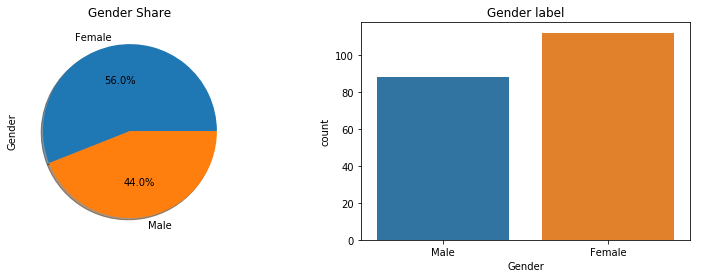

In [60]:
f,ax=plt.subplots(1,2,figsize=(13,4))

ax[0] = df['Gender'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Gender", data=df)
ax[1].set_title("Gender label")

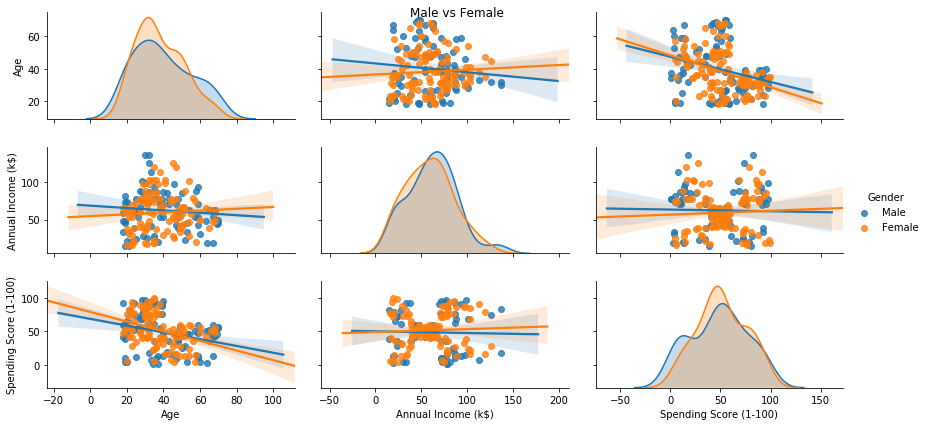

In [56]:
g = sns.pairplot(df, hue='Gender', height = 2, aspect = 2, kind="reg")
g.fig.suptitle("Male vs Female")
plt.show()

### Relationships between numerical variables

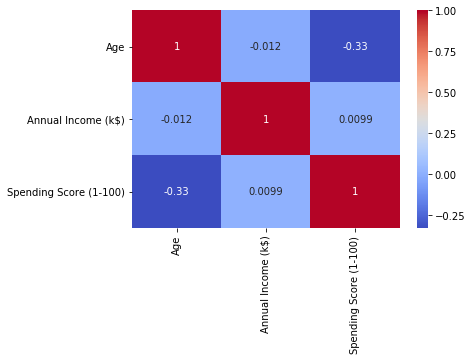

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Spending Score in different variables

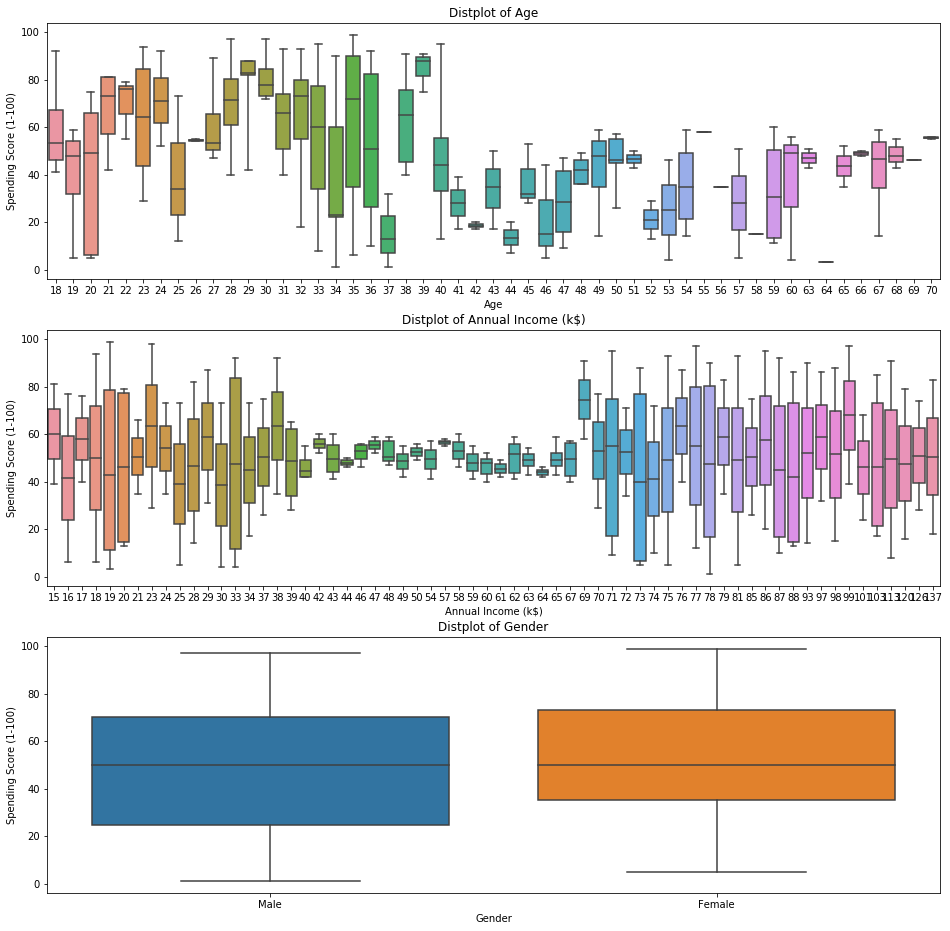

In [73]:
plt.figure(1 , figsize = (16 , 16))
cols = ['Age' , 'Annual Income (k$)' , 'Gender']
n = 0
for x in cols:
    n += 1
    plt.subplot(3 , 1 , n)
    #### n is which subplot to draw
    sns.boxplot(x=x, y='Spending Score (1-100)', data=df, whis='range')
    #### x is a factor var now
    plt.title('Distplot of {}'.format(x))

## **Part 4: Brain Storming
#### How to analyze? Supervised or Unsupervised? What models and algorithms?

<strong>Supervised Learning </strong>is one in which we teach the machine by providing both independent and dependent variables. <br>
<strong>Unsupervised Learning </strong>mainly deals with identifying the structure or pattern of the data. In this type of algorithms, we do not have labeled data(or the dependent variable is absent) <br>
For this dataset, The shopping complexes are trying to make use of their customers’ data and develop ML models to target the right ones. The goal is tring to not only increases sales but also makes the complexes efficient. There is no specific dependent variable, so we use unsupervised learning to solve the problem.

## **Part 5: Algorithms and Models

### 1. K-means

** Difference between K-means clustering & hierarchical clustering <br>
<strong>K-means clustering</strong> specifically tries to put the data into the number of cluster you tell it to. <br>
<strong>Hierarchical clustering</strong> just tells you, what 2 two things are most smilliar.

<strong>Elbow Method:</strong> <br>
Intuitively, we can say that, if k increases, the within-cluster SSE (“wcss”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

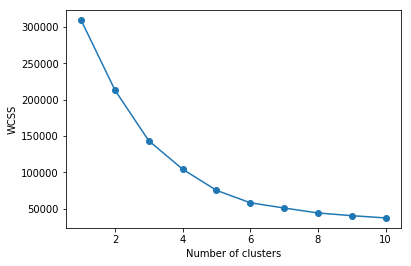

In [81]:
# WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 1. n_init=10: to run the k-means clustering algorithms 10 times 
# independently with different random centroids to choose the final model as the one with the lowest SSE

# 2. max_iter = 300: specify the maximum number of iterations for each single run (here, 300)

<font color = 'blue'> The result still hard to decide K = 4 or 5 or 6, so I decide to try each of them

#### K = 4

In [89]:
X = df.iloc[:, [1, 2]].values

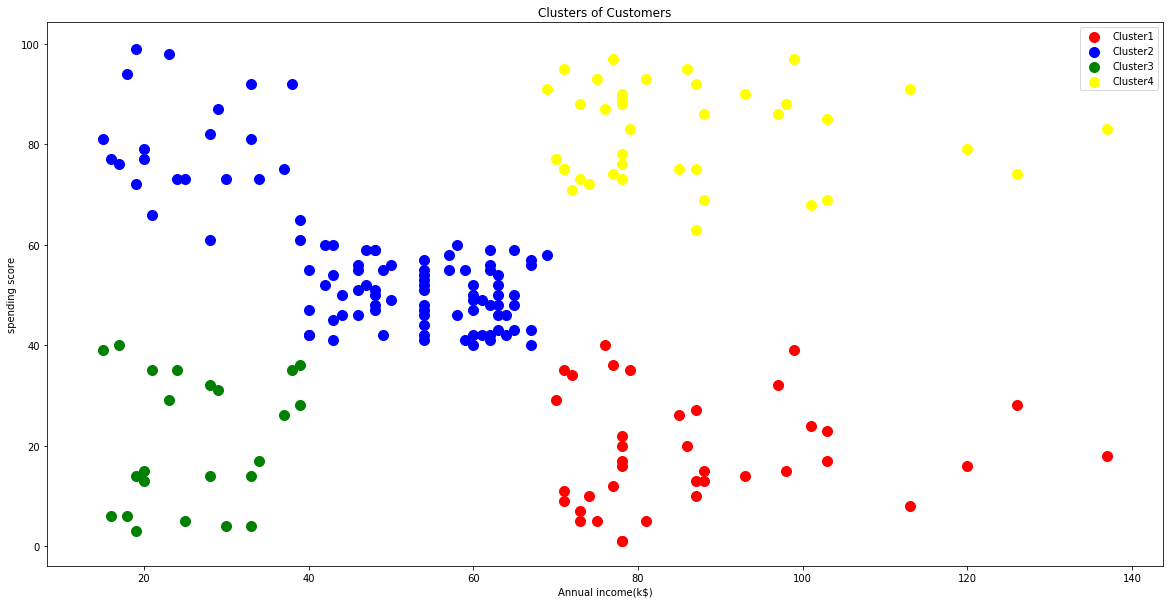

In [100]:
fig= plt.figure(figsize=(20,10))
#Taking number of clusters = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()

#### K = 5

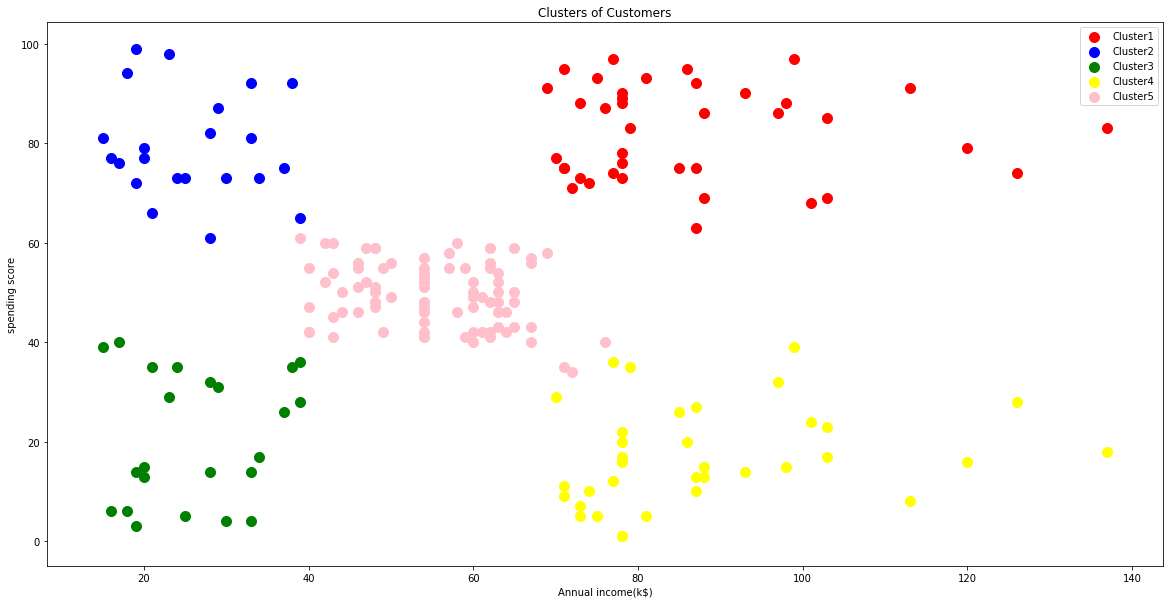

In [99]:
fig= plt.figure(figsize=(20,10))
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()


#### K = 6

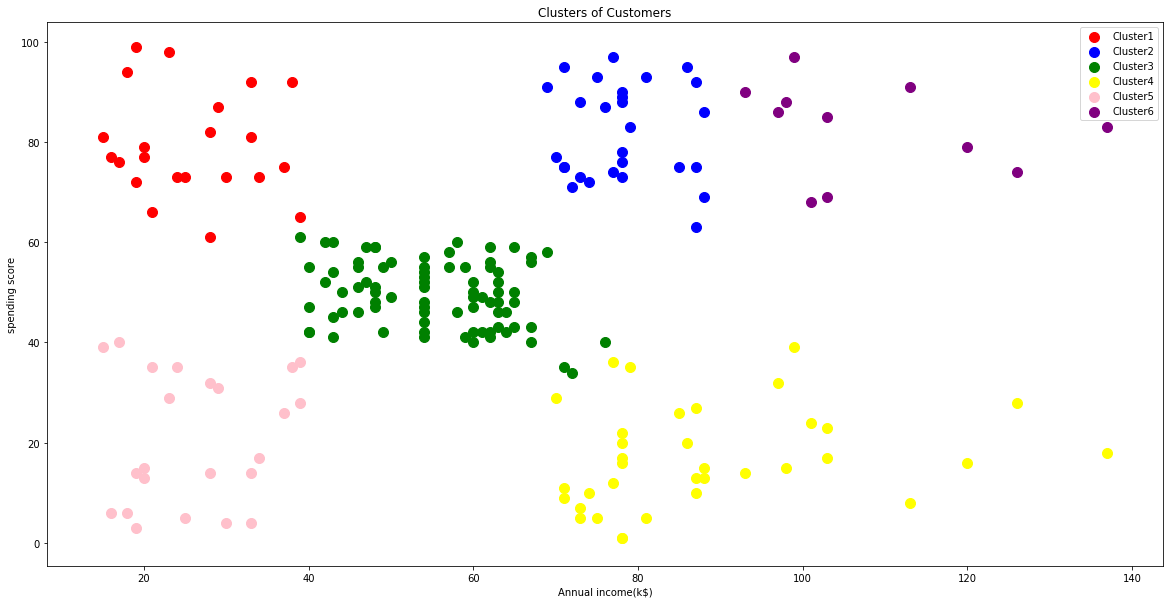

In [98]:
fig= plt.figure(figsize=(20,10))
#Taking number of clusters = 6
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster6')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()

<font color = 'blue'>It looks like K = 5 is the best

<strong>K-mean resources:</strong> <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c  <br>
https://towardsdatascience.com/mall-customers-segmentation-using-machine-learning-274ddf5575d5  <br>
https://medium.com/@cagriaydogdu2334/3d-visualization-of-k-means-clustering-47d3d3e82117  <br>
https://medium.com/@cagriaydogdu2334/3d-visualization-of-k-means-clustering-47d3d3e82117  <br>
https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

### 2. Hierachical Cluster

### Linkage = ward

In [113]:
from scipy.spatial import distance_matrix

dist = distance_matrix(df,df)
#### compute distance between each point
print(dist)

[[  0.          42.04759208  33.06055051 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.02666193 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.06055051  75.02666193   0.         ... 129.88456413 122.19247113
  143.77760604]
 ...
 [117.1110584  111.7631424  129.88456413 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.19247113 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77760604 ...  14.35270009  65.03076195
    0.        ]]


C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


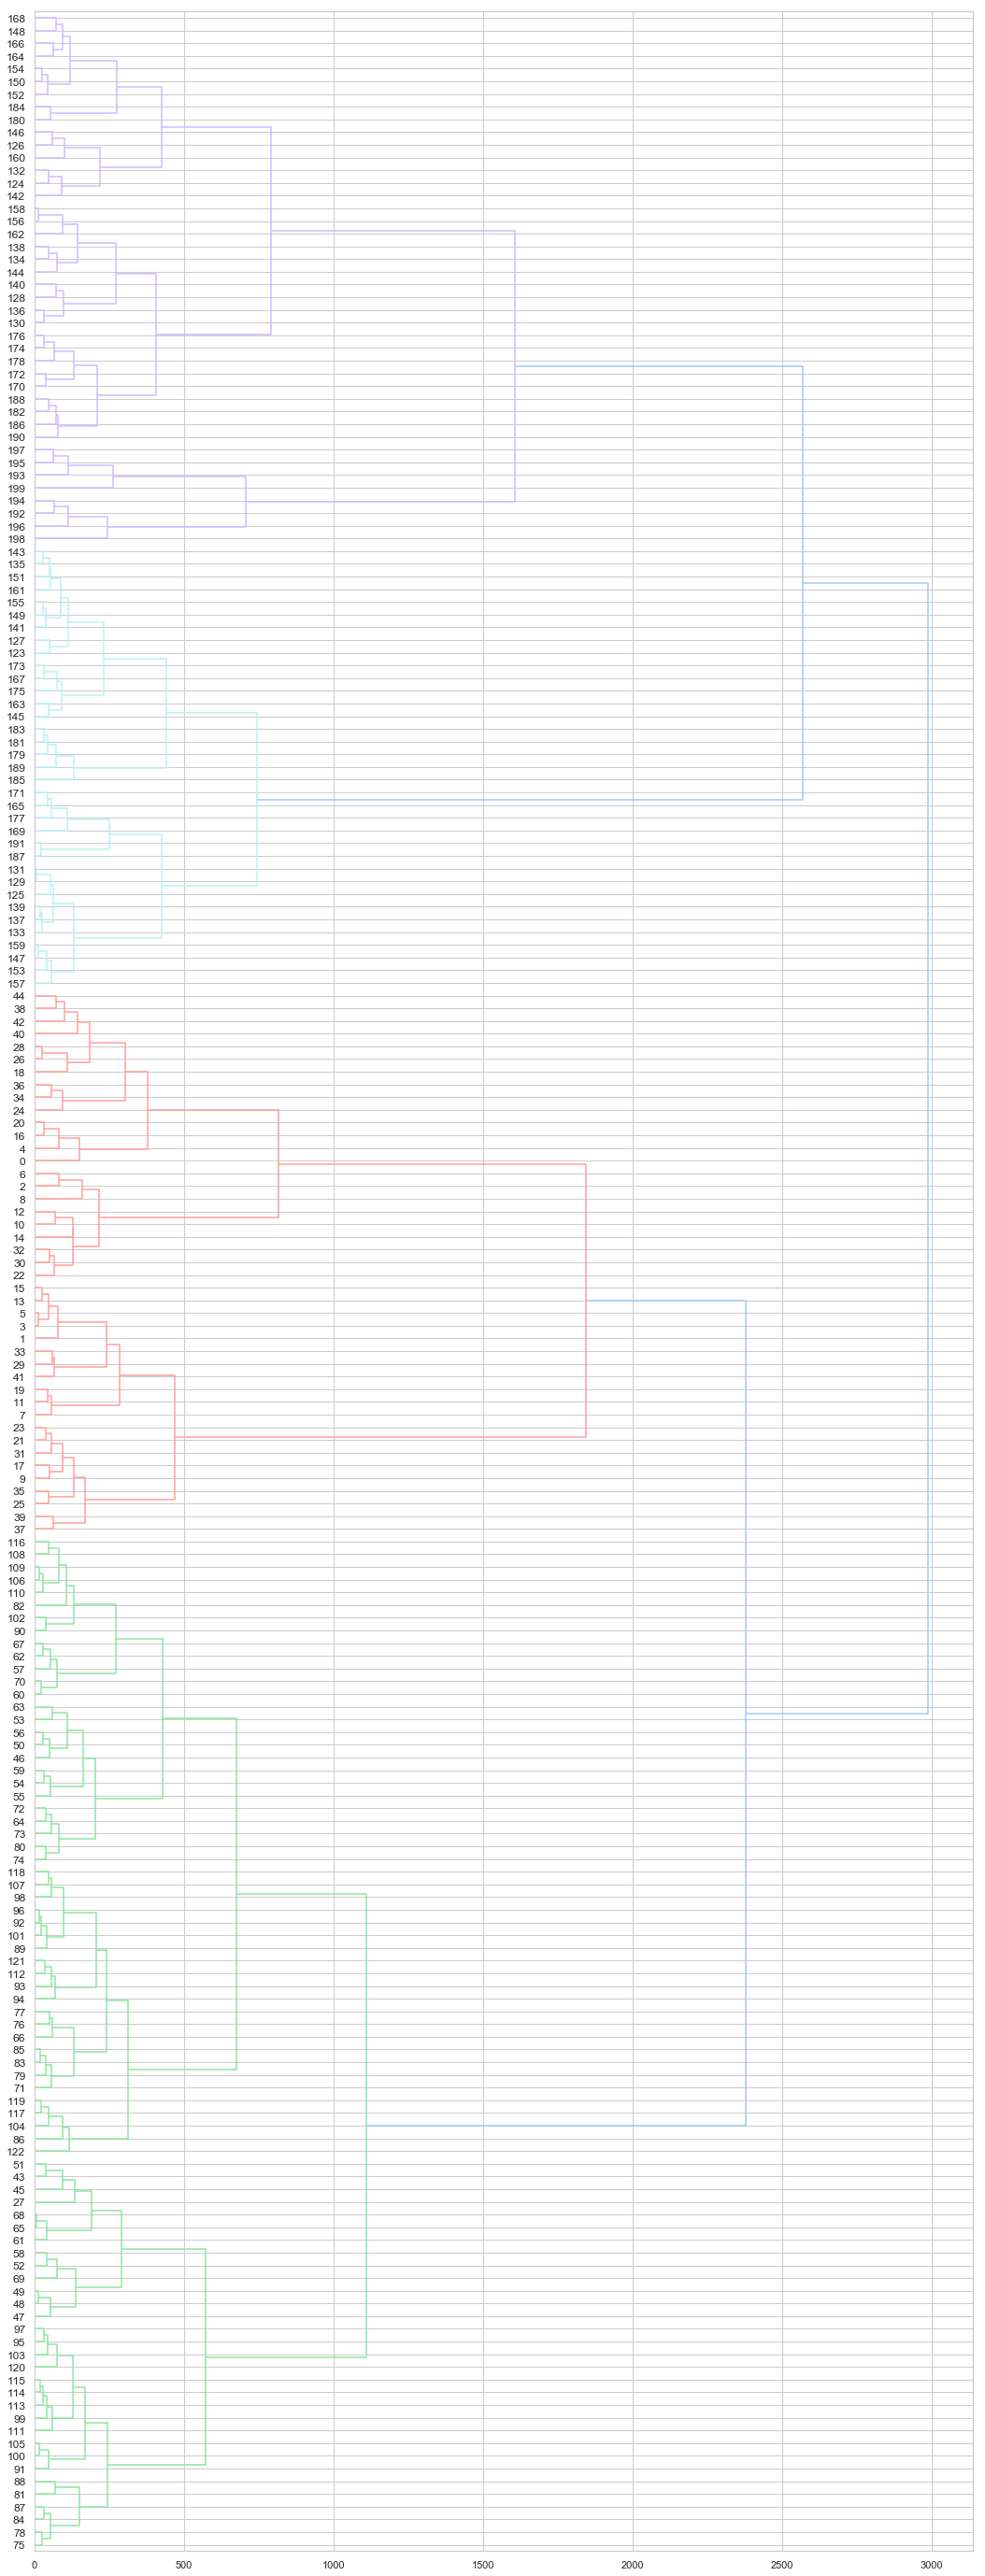

In [114]:
from scipy.cluster.hierarchy import linkage

link= linkage(dist, 'ward')
plt.figure(figsize=(18,50))
dendrogram(link, leaf_rotation= 0, leaf_font_size= 12, orientation= 'right')

plt.show()

In [117]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

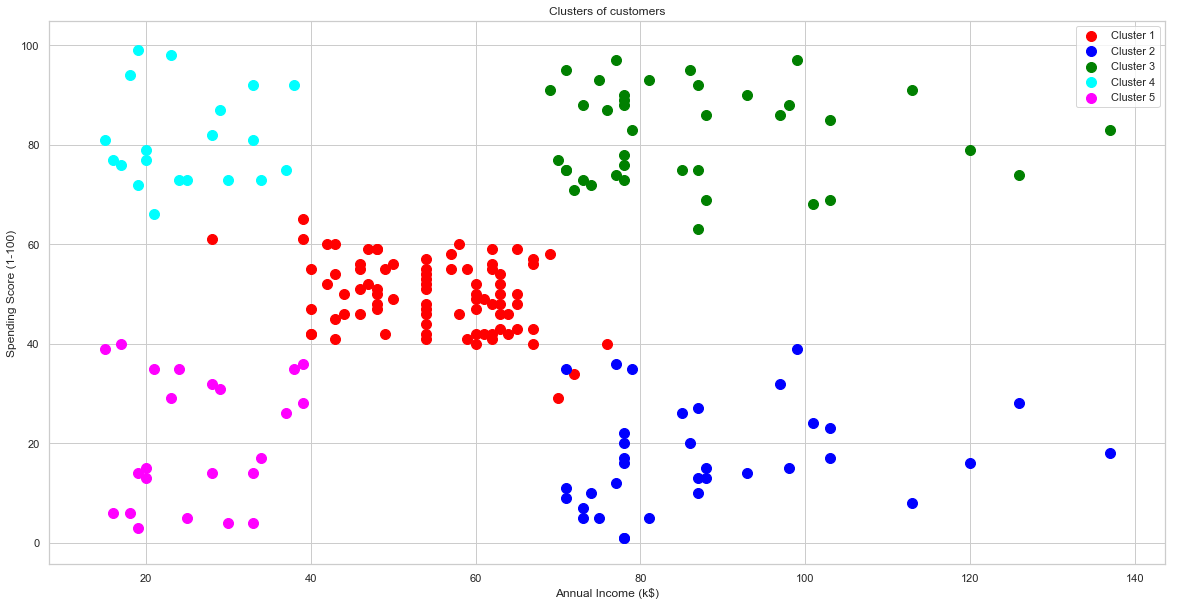

In [120]:
fig= plt.figure(figsize=(20,10))
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Linkage = complete

C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


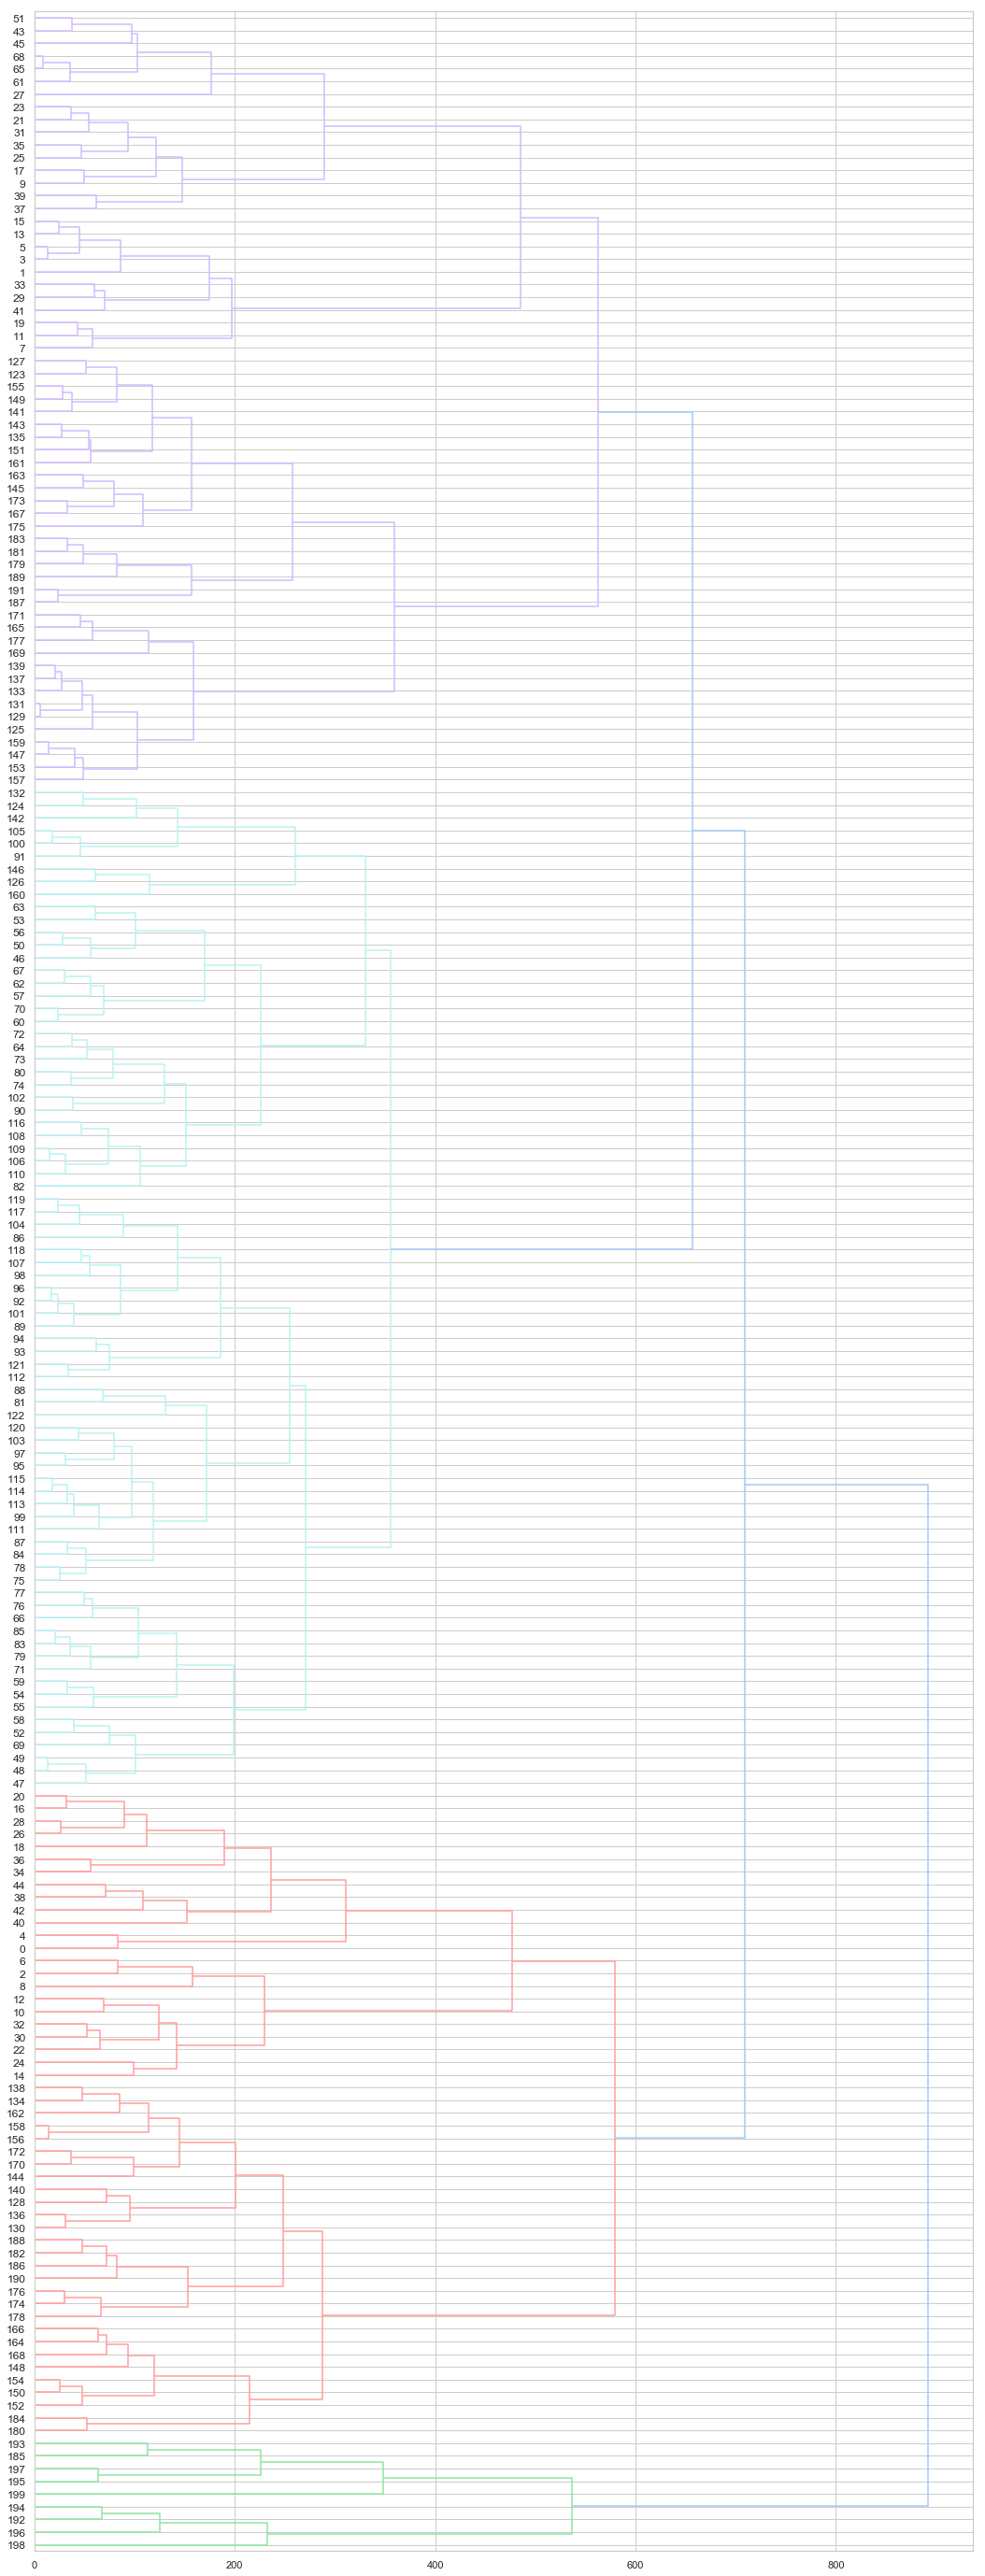

In [115]:
from scipy.cluster.hierarchy import linkage

link= linkage(dist, 'complete')
plt.figure(figsize=(18,50))
dendrogram(link, leaf_rotation= 0, leaf_font_size= 12, orientation= 'right')

plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(df)

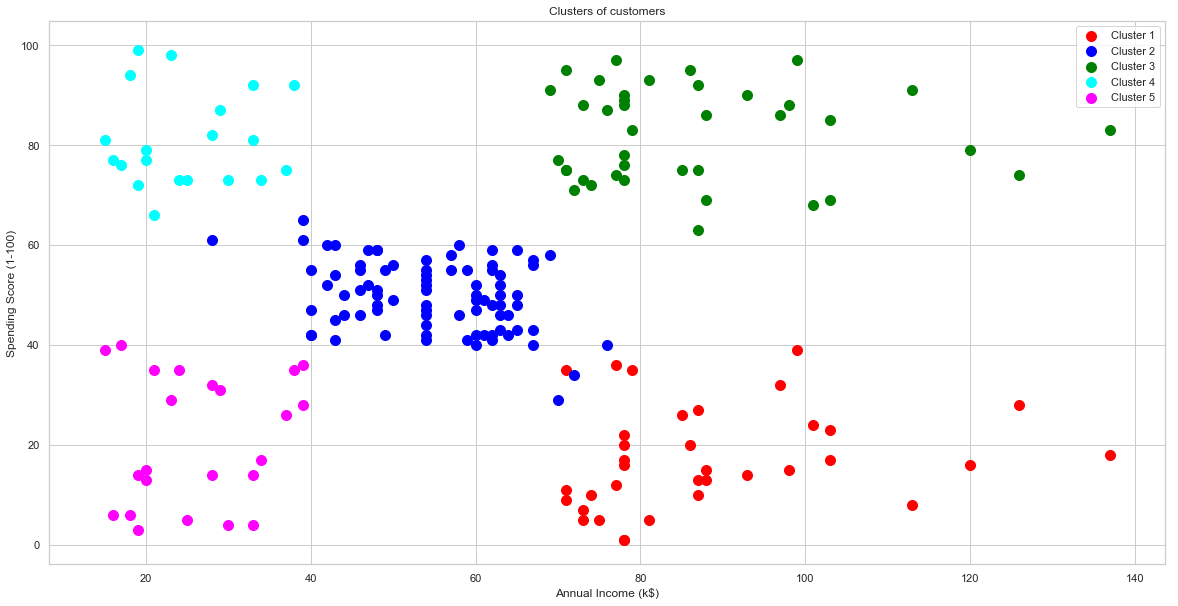

In [122]:
fig= plt.figure(figsize=(20,10))
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Linkage = average

C:\Users\howar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


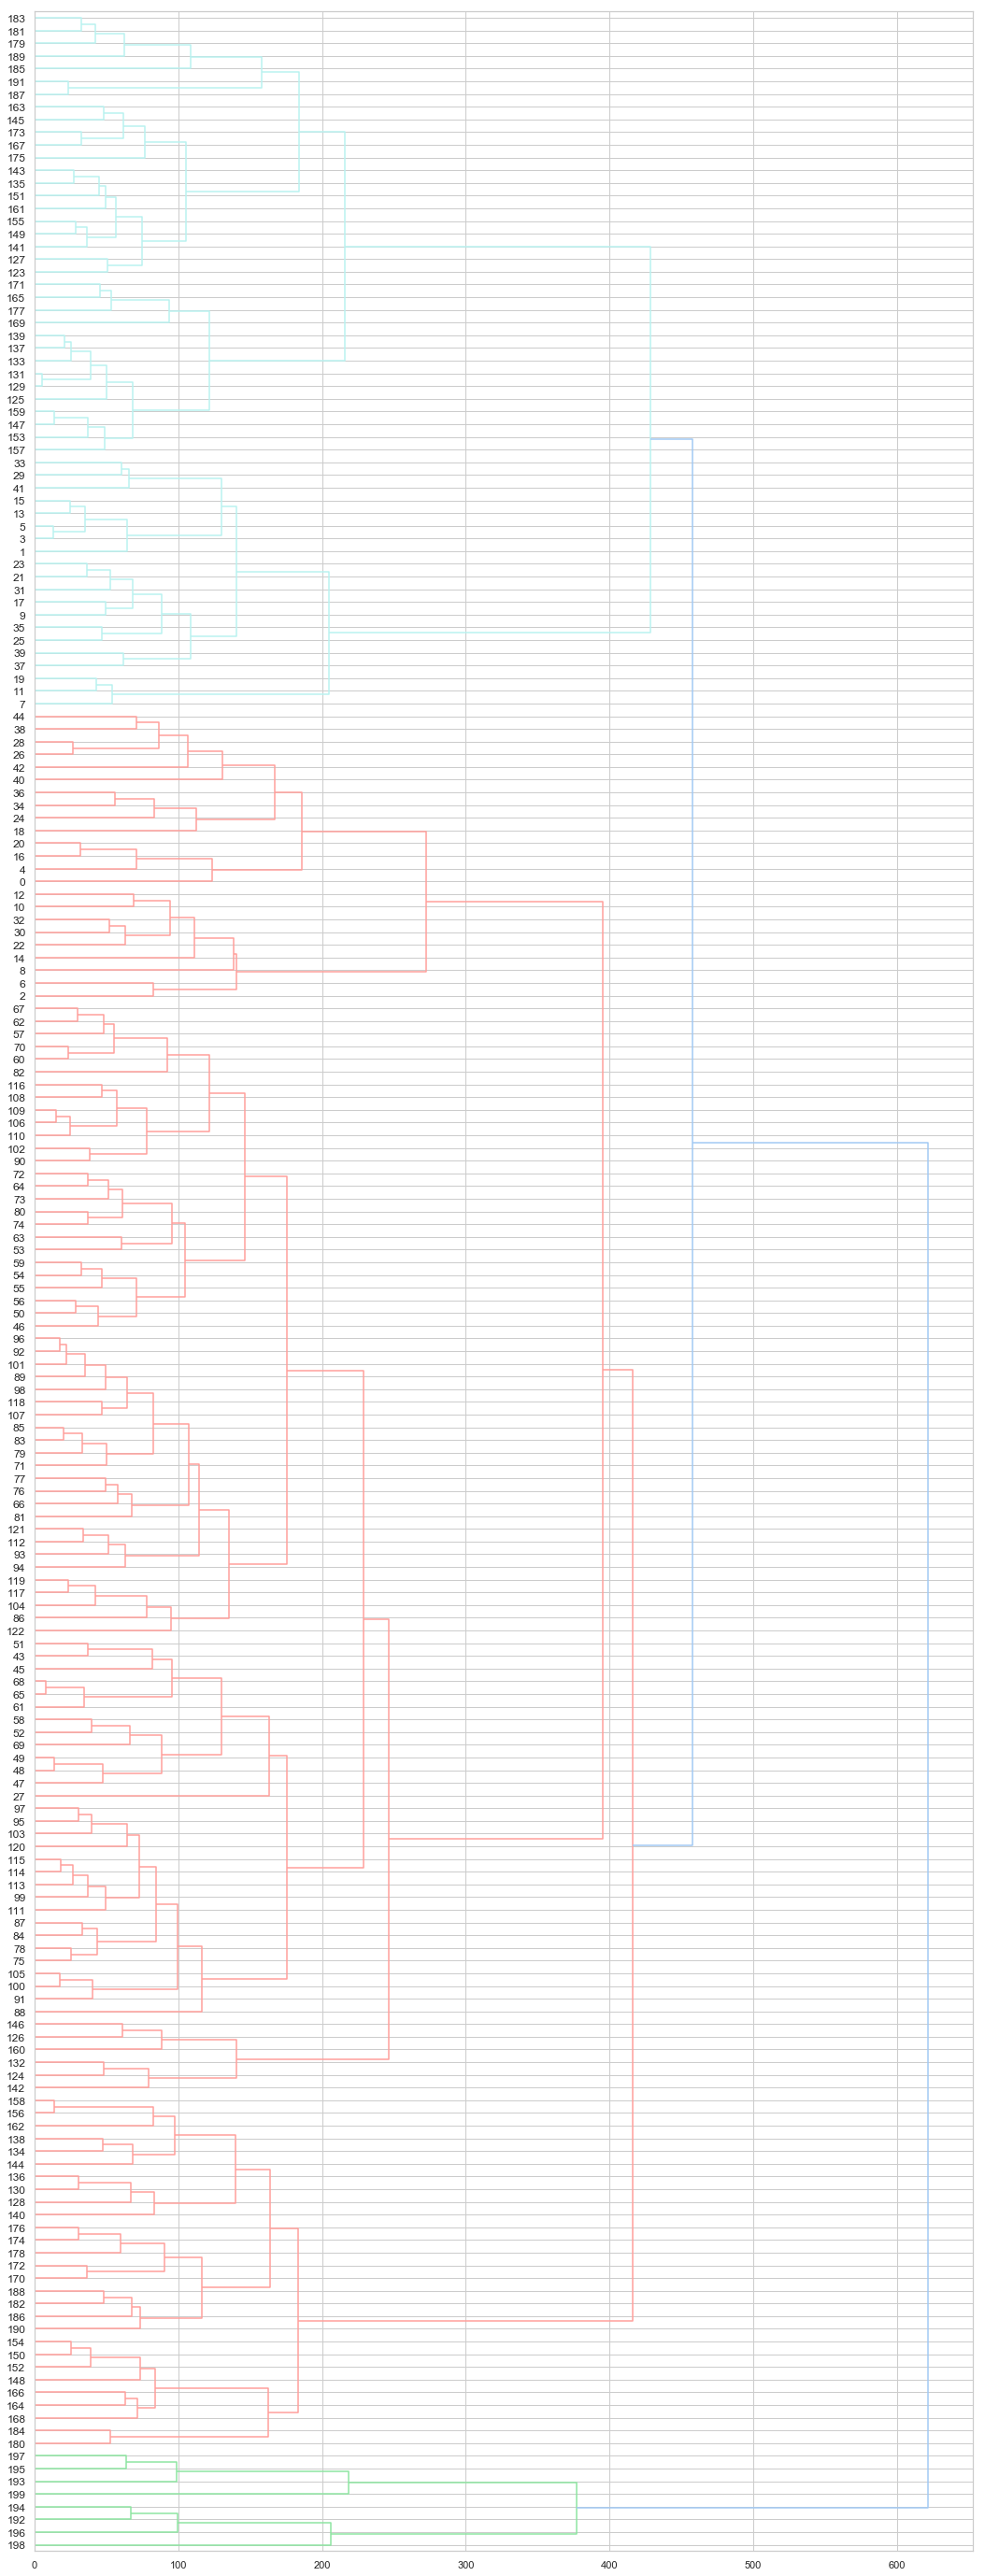

In [116]:
from scipy.cluster.hierarchy import linkage

link= linkage(dist, 'average')
plt.figure(figsize=(18,50))
dendrogram(link, leaf_rotation= 0, leaf_font_size= 12, orientation= 'right')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(df)

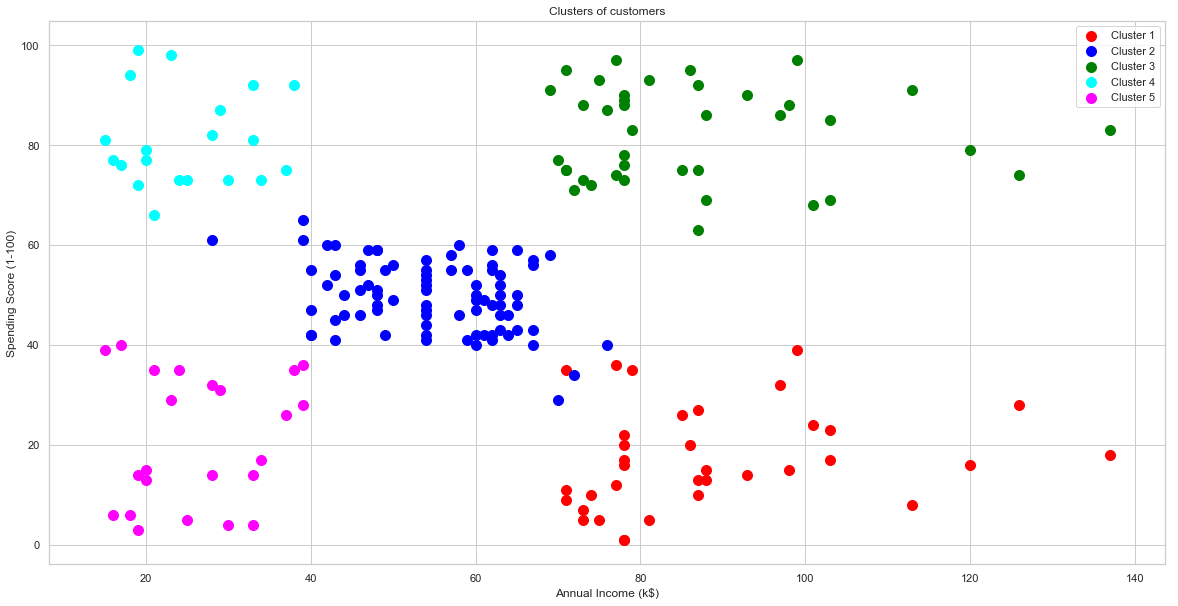

In [123]:
fig= plt.figure(figsize=(20,10))
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<strong>TSNE</strong>: a dimensionality reduction method, like PCA, we can use it when have small sample with many dimension (Variables)
but NOT like PCA focusing on the Varianbility of data, TSNE focuses on the smilatrity.
Thus, TSNE is good at clustering.

### 3. Mean Shift Algorithm

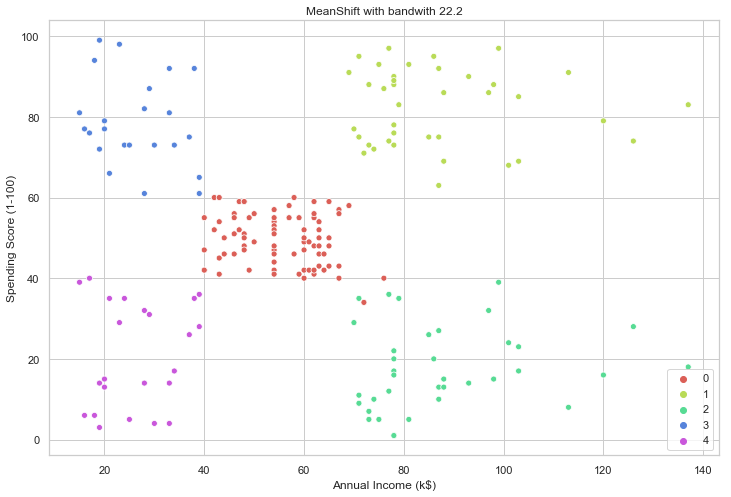

In [130]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(df, quantile= 0.1)
#### let algorithm help us to find a good bandwidth
ms=MeanShift(bandwidth).fit(df)

df_l_ms = df
df_l_ms.label= ms.labels_

plt.figure(figsize=(12,8))
sns.scatterplot(df_l_ms['Annual Income (k$)'], df_l_ms['Spending Score (1-100)'], hue= df_l_ms.label, 
               palette= sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift with bandwith {}'.format(round(bandwidth,2)))
plt.show()

## **Part6: Conclusion

All three algorithms are not much different. <br>

<strong>In cluster 1 </strong>we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities. <br>

<strong>In cluster 2</strong> we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.<br>

<strong>In cluster 3</strong> we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.  <br>

<strong>In cluster 4</strong> we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.  <br>

<strong>In cluster 5</strong> we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score. <br>


Finally, based on our machine learning technique we may deduce that to increase the profits of the mall, <strong>the mall authorities should target people belonging to cluster 3 and cluster 5 and should also maintain its standards to keep the people belonging to cluster 1 and cluster 2 happy and satisfied.</strong>